# Density Profile Plot

This notebook creates a 1D continuous density profile plot annotating how that
profile relates to density based clustering.

In [1]:
import numpy as np
import scipy as sp
from _plotting import *
palette = configure_matplotlib()
palette  = sns.color_palette('cubehelix', 6)[1:]

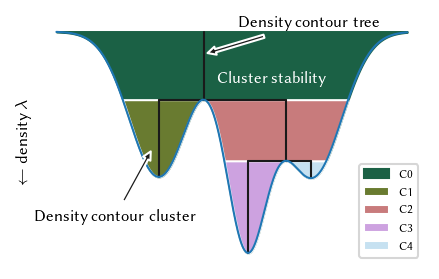

In [2]:
centers = [-0.5, 0.1, 0.55]
deviations = [0.2, 0.14, 0.2]
x = np.linspace(-1.2, 1.2, 1000)
y = np.vstack([
    sp.stats.norm(loc=mu, scale=sigma).pdf(x)
    for mu, sigma in zip(centers, deviations)
]).sum(axis=0)

idx_minima = np.where(np.r_[True, y[1:] < y[:-1]] & np.r_[y[:-1] < y[1:], True])[0][1:3]
x_minima = x[idx_minima]
y_minima = y[idx_minima]

idx_maxima = np.where(np.r_[True, y[1:] > y[:-1]] & np.r_[y[:-1] > y[1:], True])[0]
x_maxima = x[idx_maxima]
y_maxima = y[idx_maxima]


sized_fig(1/2)
plt.fill_between(x, y, 0, color=palette[0], label='C0')
plt.fill_between(x, y, y_minima[0], where=(y >= y_minima[0]) & (x < x_minima[0]), facecolor=palette[1], label='C1')
plt.fill_between(x, y, y_minima[0], where=(y >= y_minima[0]) & (x > x_minima[0]), facecolor=palette[2], label='C2')
plt.fill_between(x, y, y_minima[1], where=(y >= y_minima[1]) & (x > x_minima[0]) & (x < x_minima[1]), facecolor=palette[3], label='C3')
plt.fill_between(x, y, y_minima[1], where=(y >= y_minima[1]) & (x > x_minima[0]) & (x > x_minima[1]), facecolor=palette[4], label='C4')
plt.plot([x_minima[0], x_minima[0]], [y_minima[0], 0], linewidth=1, color='k')
plt.plot([x_maxima[0], x_maxima[0]], [y_maxima[0], y_minima[0]], linewidth=1, color='k')
plt.plot([x_maxima[0], x_minima[1]], [y_minima[0], y_minima[0]], linewidth=1, color='k')
plt.plot([x_minima[1], x_minima[1]], [y_minima[0], y_minima[1]], linewidth=1, color='k')
plt.plot([x_maxima[1], x_maxima[1]], [y_maxima[1], y_minima[1]], linewidth=1, color='k')
plt.plot([x_maxima[2], x_maxima[2]], [y_maxima[2], y_minima[1]], linewidth=1, color='k')
plt.plot([x_maxima[1], x_maxima[2]], [y_minima[1], y_minima[1]], linewidth=1, color='k')
plt.plot(x, y, linewidth=1)
plt.annotate("Density contour cluster", (x_maxima[0]-0.04, y_maxima[0] -0.4), (-1.35, 2.6), arrowprops={'arrowstyle': 'simple', 'facecolor': 'k'})
plt.annotate("Density contour tree", (x_minima[0], y_minima[0] / 3), (0.05, -0.07), arrowprops={'arrowstyle': 'simple', 'facecolor': 'k'})
plt.annotate("Cluster stability", (-0.1, 0.7), color='white')
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
plt.legend(loc='lower right')
plt.ylabel('$\leftarrow$ density $\lambda$')
plt.subplots_adjust(0.06, 0, 1, 0.96)
plt.savefig('./images/1d_density_profile.png', dpi=300)
plt.show()